In [1]:
%matplotlib inline
# dependencies and set up
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [3]:
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
# read the ride data file and store it in a pandas df
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [5]:
# get the columns and the rows that not null
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [6]:
# get the columns and rows that are not null
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [7]:
# ge the data types for each column
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [8]:
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [9]:
# get the number of data points from the urban cities
sum(city_data_df['type']=='Urban')

66

In [10]:
# get the number of data points from the suburban cities
sum(city_data_df['type']=='Suburban')

36

In [11]:
# get the columns and rows that are not null in ride data
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [12]:
# get the columns and rows that are not null in ride data
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [13]:
# get the data types for each column
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [14]:
# combine the data into a single dataframe
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])
# display new df
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [15]:
# create the urban city dataframe
urban_cities_df = pyber_data_df[pyber_data_df["type"]=="Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [16]:
# create the suburban and rural dataframes
suburban_cities_df = pyber_data_df[pyber_data_df["type"]=="Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"]=="Rural"]
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [17]:
# get the number of rides for urban cities
urban_ride_count= urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [18]:
# create the suburban and rural ride count
suburban_ride_count = suburban_cities_df.groupby(['city']).count()['ride_id']
rural_ride_count = rural_cities_df.groupby(['city']).count()['ride_id']

In [19]:
# get the avg fare for each city
urban_avg_fare = urban_cities_df.groupby(['city']).mean()['fare']
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [20]:
# get the avg fare for suburban and rural cities
suburban_avg_fare = suburban_cities_df.groupby(['city']).mean()['fare']
rural_avg_fare = rural_cities_df.groupby(['city']).mean()['fare']

In [21]:
# get the avg number of drivers for each city
urban_driver_count = urban_cities_df.groupby(['city']).mean()['driver_count']
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [22]:
# get the avg number of drivers for each city in rural and suburban
suburban_driver_count = suburban_cities_df.groupby(['city']).mean()['driver_count']
rural_driver_count = rural_cities_df.groupby(['city']).mean()['driver_count']

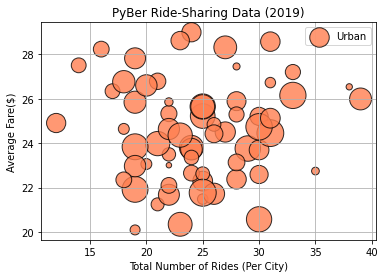

In [23]:
# build the scatter plots for urban cities
plt.scatter(urban_ride_count, 
            urban_avg_fare,
            s=10*urban_driver_count,
            c='coral', edgecolor='black',
            linewidths=1, alpha=0.8, label='Urban')
plt.title('PyBer Ride-Sharing Data (2019)')
plt.ylabel('Average Fare($)')
plt.xlabel('Total Number of Rides (Per City)')
plt.grid('True')
plt.legend()

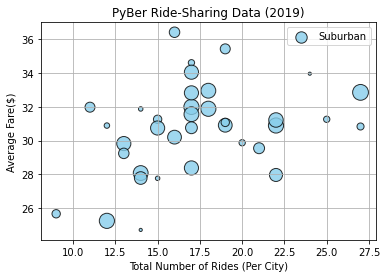

In [24]:
# scatter plt for suburban cities
plt.scatter(suburban_ride_count,
           suburban_avg_fare,
           s=10*suburban_driver_count,
           c='skyblue', edgecolor='black',
           linewidths=1, alpha=0.8, label='Suburban')
plt.title('PyBer Ride-Sharing Data (2019)')
plt.ylabel('Average Fare($)')
plt.xlabel('Total Number of Rides (Per City)')
plt.grid('True')
plt.legend()

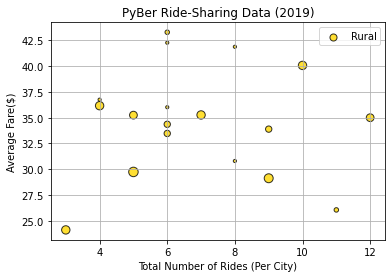

In [25]:
# scatter plt for rural cities
plt.scatter(rural_ride_count,
           rural_avg_fare,
           s=10*rural_driver_count, c='gold',
           edgecolor='black', linewidths=1,
           alpha=0.8, label='Rural')
plt.title('PyBer Ride-Sharing Data (2019)')
plt.ylabel('Average Fare($)')
plt.xlabel('Total Number of Rides (Per City)')
plt.grid('True')
plt.legend()

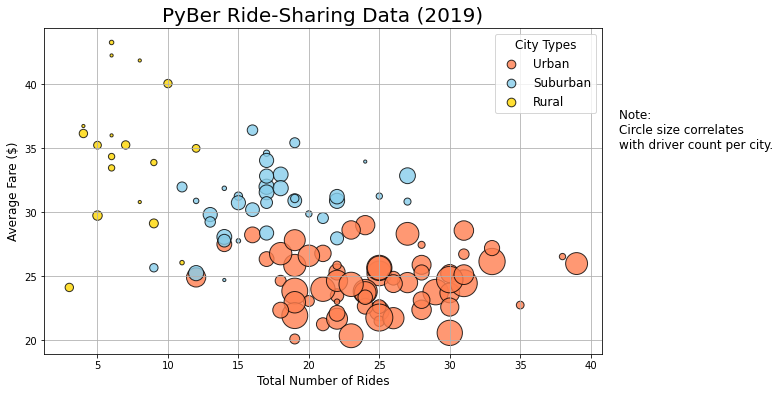

In [26]:
# add the scatter charts for each type of city
plt.subplots(figsize=(10,6))
plt.scatter(urban_ride_count, 
            urban_avg_fare,
            s=10*urban_driver_count,
            c='coral', edgecolor='black',
            linewidths=1, alpha=0.8, label='Urban')
plt.scatter(suburban_ride_count,
           suburban_avg_fare,
           s=10*suburban_driver_count,
           c='skyblue', edgecolor='black',
           linewidths=1, alpha=0.8, label='Suburban')
plt.scatter(rural_ride_count,
           rural_avg_fare,
           s=10*rural_driver_count, c='gold',
           edgecolor='black', linewidths=1,
           alpha=0.8, label='Rural')

#add other graph properties
plt.title('PyBer Ride-Sharing Data (2019)', fontsize=20)
plt.ylabel('Average Fare ($)', fontsize=12)
plt.xlabel('Total Number of Rides', fontsize=12)
plt.grid(True)
lgnd = plt.legend(fontsize='12', mode='Expanded',
                 scatterpoints=1, loc='best', title='City Types')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# add label about circle sizes
plt.text(42, 35, "Note: \nCircle size correlates \nwith driver count per city.", fontsize='12')

# save the figure
#plt.savefig('analysis/Fig1.png')

plt.show()

In [27]:
# get summary stats
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [28]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [29]:
# calculate mean of ride count for each city type
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [30]:
# calculate median of ride count for each city type
round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [31]:
# calculate mode of ride count for suburban cities
suburban_ride_count.mode()

0    17
dtype: int64

In [32]:
# import numpy and the stats module from scipy
import numpy as np
import scipy.stats as sts

In [33]:
# calculate measures of cntrl tendency for urban ride count
mean_urban_ride_count = np.mean(urban_ride_count)
print(f'The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.')
median_urban_ride_count = np.median(urban_ride_count)
print(f'The median for the ride counts for urban trips is {median_urban_ride_count}.')
mode_urban_ride_count = sts.mode(urban_ride_count)
print(f'The mode for the ride counts for urban trips is {mode_urban_ride_count}.')

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22]), count=array([7])).


In [34]:
mode_rural_ride_count = sts.mode(rural_ride_count)
print(f'The mode for the ride counts for urban trips is {mode_rural_ride_count}.')

The mode for the ride counts for urban trips is ModeResult(mode=array([6]), count=array([5])).


In [35]:
# get the fares for the urban cities.
urban_fares = urban_cities_df['fare']
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [36]:
# calculate measures of cntrl tendency for avg fare
mean_urban_fares= np.mean(urban_fares)
print(f'The mean fare price for urban trips is ${mean_urban_fares:.2f}.')
median_urban_fares= np.median(urban_fares)
print(f'The median fare price for urban trips is ${median_urban_fares:.2f}.')
mode_urban_fares= sts.mode(urban_fares)
print(f'The mode fare price for urban trips is ${mode_urban_fares}.')

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is $ModeResult(mode=array([22.86]), count=array([5])).


In [37]:
# get driver count data from urban cities
urban_drivers = urban_cities_df['driver_count']
urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [38]:
suburban_drivers = suburban_cities_df['driver_count']
mean_suburban_drivers= np.mean(suburban_drivers)
print(f'The mean drivers in suburban areas are {mean_suburban_drivers} drivers.')

The mean drivers in suburban areas are 13.712 drivers.


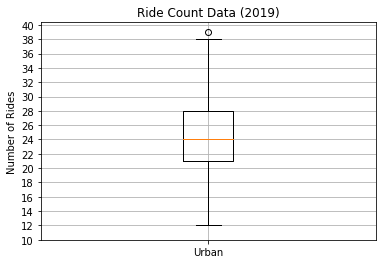

In [39]:
# create a box and whisker plot for the urban cities ride count
x_labels = ['Urban']
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)

# add title, labels and grid
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

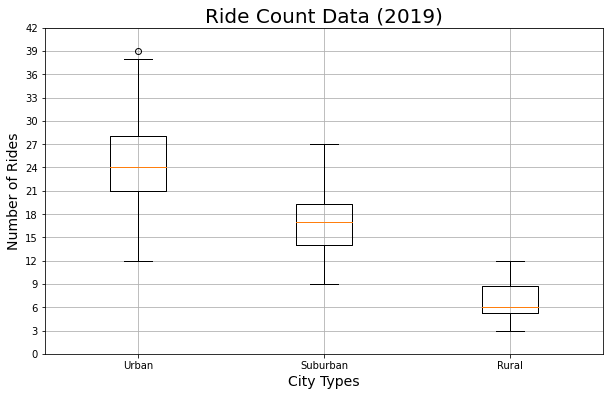

In [40]:
# add all ride count box and whisker to the same plot
x_labels = ['Urban', 'Suburban', 'Rural']
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10,6))
ax.set_title('Ride Count Data (2019)', fontsize=20)
ax.set_ylabel('Number of Rides', fontsize=14)
ax.set_xlabel('City Types', fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0,45, step=3.0))
ax.grid()
#save the fig
#plt.savefig('analysis/Fig2.png')
plt.show()

In [41]:
# get the city that matches 39
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f'{urban_city_outlier} has the highest rider count.')

West Angela has the highest rider count.


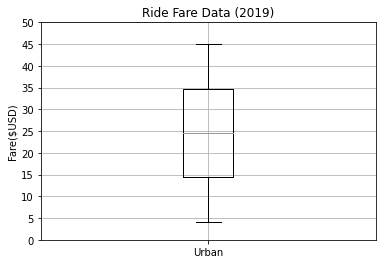

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [42]:
# create a box and whisker for the urban fare data
x_labels = ['Urban']
fig, ax=plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)

# add the title, labels, and grids
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0,51, step=5.0))
ax.grid()
plt.show()
print('Summary Statistics')
urban_fares.describe()

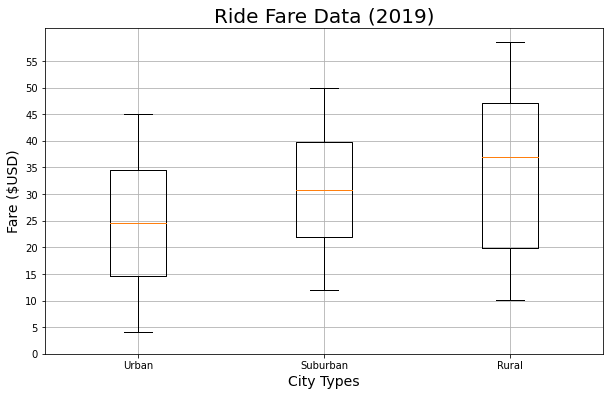

In [43]:
suburban_fares = suburban_cities_df['fare']
rural_fares = rural_cities_df['fare']
# add all ride count box and whisker to the same plot
x_labels = ['Urban', 'Suburban', 'Rural']
ride_fare_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize=(10,6))
ax.set_title('Ride Fare Data (2019)', fontsize=20)
ax.set_ylabel('Fare ($USD)', fontsize=14)
ax.set_xlabel('City Types', fontsize=14)
ax.boxplot(ride_fare_data, labels=x_labels)
ax.set_yticks(np.arange(0,60, step=5.0))
ax.grid()
# save the fig
#plt.savefig('analysis/Fig3.png')
plt.show()

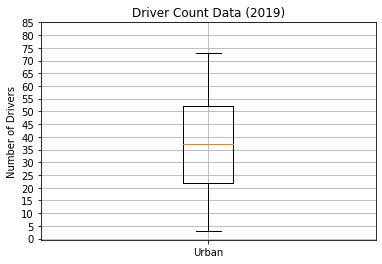

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [44]:
# box and whisker plot for urban driver count data
x_labels=['Urban']
fig, ax=plt.subplots()
ax.boxplot(urban_drivers, labels=x_labels)
# add the title, label, and grid
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers')
ax.set_yticks(np.arange(0,90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()

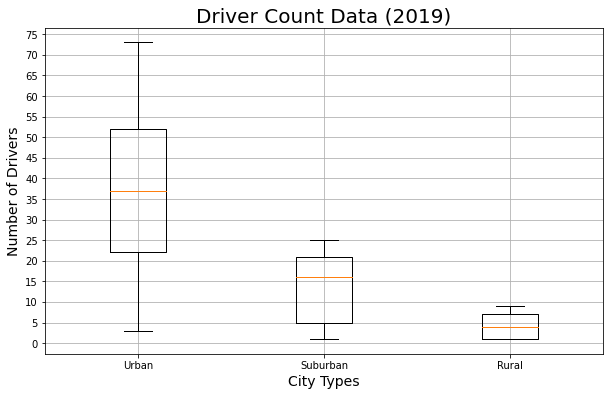

In [45]:
rural_drivers = rural_cities_df['driver_count']
# add all driver count box and whisker to the same plot
x_labels = ['Urban', 'Suburban', 'Rural']
driver_data = [urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots(figsize=(10,6))
ax.set_title('Driver Count Data (2019)', fontsize=20)
ax.set_ylabel('Number of Drivers', fontsize=14)
ax.set_xlabel('City Types', fontsize=14)
ax.boxplot(driver_data, labels=x_labels)
ax.set_yticks(np.arange(0,76, step=5.0))
ax.grid()
# save the fig
#plt.savefig('analysis/Fig4.png')
plt.show()

In [46]:
# get the sum of fares for each city type
sum_fares_by_type = pyber_data_df.groupby(['type']).sum()['fare']
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [47]:
# get the sum of all fares
total_fares = pyber_data_df['fare'].sum()
total_fares

63538.64

In [48]:
type_percents = 100* sum_fares_by_type / total_fares
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

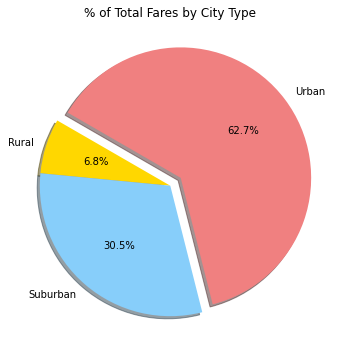

In [49]:
# build the percentage of fares by city type pie chart
import matplotlib as mpl
plt.subplots(figsize=(10,6))
plt.pie(type_percents, 
        labels=['Rural', 'Suburban', 'Urban'],
       colors=['gold','lightskyblue','lightcoral'],
       explode=[0,0,0.1],
       autopct='%.1f%%',
       shadow=True, startangle=150)
plt.title('% of Total Fares by City Type')
# increase font size
mpl.rcParams['font.size']=14
# save figure
#plt.savefig('analysis/Fig5.png')
plt.show()

In [50]:
# calculate percentage rides for each city
ride_percents = 100* pyber_data_df.groupby(['type']).count()['ride_id'] / pyber_data_df['ride_id'].count()
ride_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

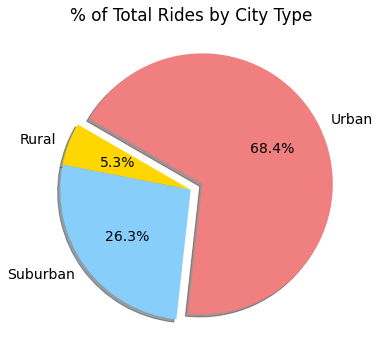

In [52]:
# build percentage of rides by city type pie chart
plt.subplots(figsize=(10,6))
plt.pie(ride_percents, 
        labels=['Rural', 'Suburban', 'Urban'],
       colors=['gold','lightskyblue','lightcoral'],
       explode=[0,0,0.1],
       autopct='%.1f%%',
       shadow=True, startangle=150)
plt.title('% of Total Rides by City Type')
# increase font size
mpl.rcParams['font.size']=14
# save figure
#plt.savefig('analysis/Fig6.png')
plt.show()